In [3]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [4]:
match_df=pd.read_csv('matches.csv')
match_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [5]:
deliveries_df=pd.read_csv('deliveries.csv')
deliveries_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


# Answers to questions

## 1. How many matches have each team played and how many did each of them win?

In [6]:
matches_team = pd.concat([match_df['team1'],match_df['team2']])
matches_team_df=matches_team.value_counts().reset_index() 

matches_team_df.columns=['team','total_matches']


winner_df=match_df.groupby('winner')[['id']].count()
winner_df=winner_df.sort_values('id', ascending=False).reset_index()
winner_df=winner_df.rename(columns={'winner':'team','id':'Wins'})
matches_team_df=matches_team_df.merge(winner_df,on='team')
matches_team_df['win_percentage']=matches_team_df['Wins']/matches_team_df['total_matches']*100
matches_team_df['win_percentage']=matches_team_df['win_percentage'].round(decimals=2)

### ANS:- Showing data arranged by win percentages

In [7]:
matches_team_df1=matches_team_df.copy()
matches_team_df1=matches_team_df1.sort_values(by=['win_percentage'],ascending=False)
matches_team_df1.reset_index(drop=True, inplace=True)
matches_team_df1.set_index('team', inplace=True)
matches_team_df1.drop_duplicates(keep=False,inplace=True)
matches_team_df1

,total_matches,Wins,win_percentage
team,,,
Chennai Super Kings,164,100,60.98
Mumbai Indians,187,109,58.29
Sunrisers Hyderabad,108,58,53.70
Kolkata Knight Riders,178,92,51.69
Rajasthan Royals,147,75,51.02
Royal Challengers Bangalore,180,84,46.67
Kings XI Punjab,176,82,46.59
Gujarat Lions,30,13,43.33
Kochi Tuskers Kerala,14,6,42.86


### Note: These two teams played only for 2 years as CSK and RR were banned for 2 years
* Rising Pune Supergiants	
* Gujarat Lions

### These two teams were there for very short interval of time(2 yrs)
* Pune Warriors
* Kochi Tuskers Kerala	

### Showing through graphs

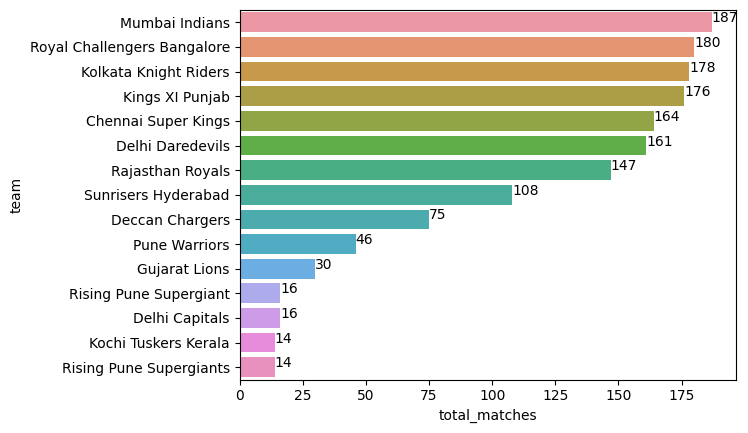

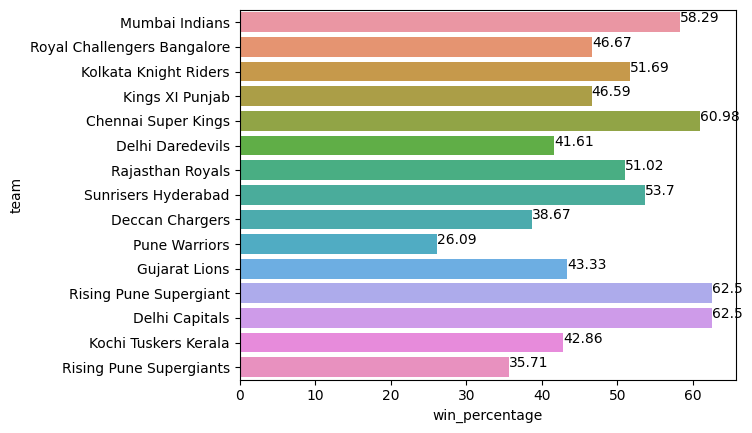

In [8]:
sns.barplot(y=matches_team_df.team,x=matches_team_df.total_matches)
for index, value in enumerate(matches_team_df.total_matches):
    plt.text(value, index, str(value))
plt.show()

plt.figure()

sns.barplot(x=matches_team_df.win_percentage,y=matches_team_df.team)
for index, value in enumerate(matches_team_df.win_percentage):
    plt.text(value, index, str(value))
plt.show()



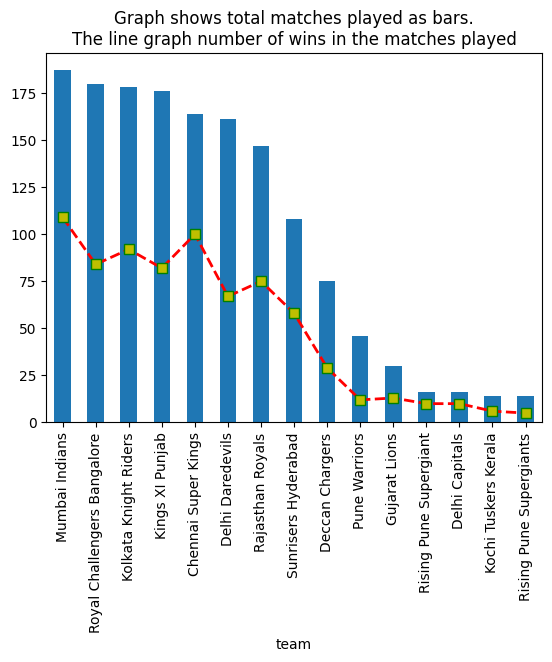

In [9]:
matches_team_dup_df=matches_team_df.copy()
matches_team_dup_df.set_index('team',inplace=True)
matches_team_dup_df['total_matches'].plot(kind="bar")
plt.plot(matches_team_df.Wins,'sr--',lw=2,mfc='y',mec='g',markersize=7)
plt.title("Graph shows total matches played as bars.\nThe line graph number of wins in the matches played")
plt.show()


# At which location were more matches played?

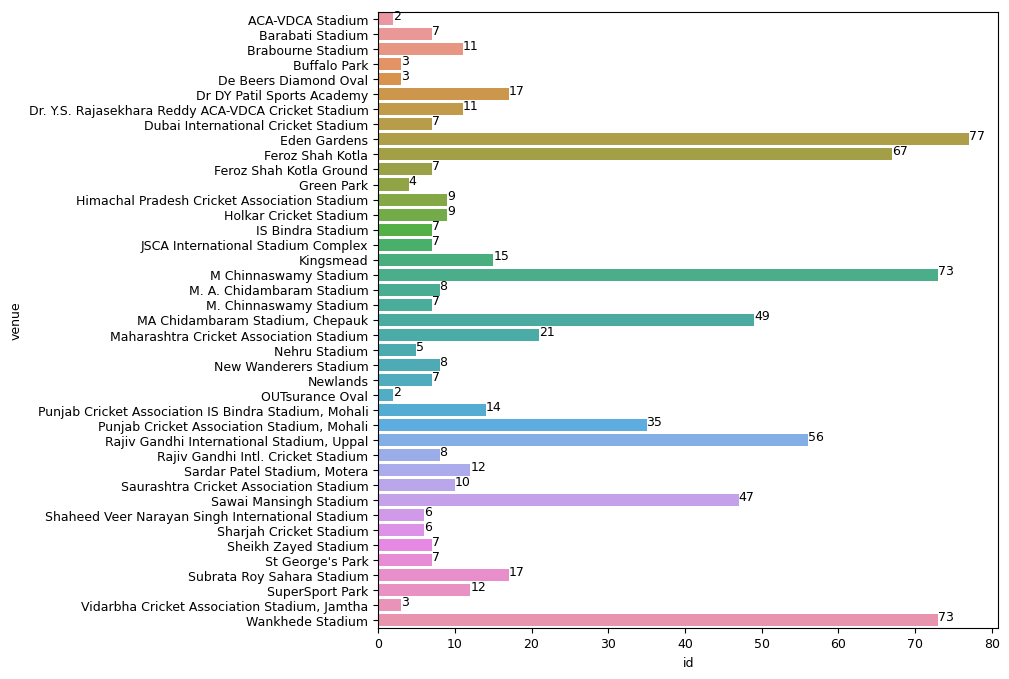

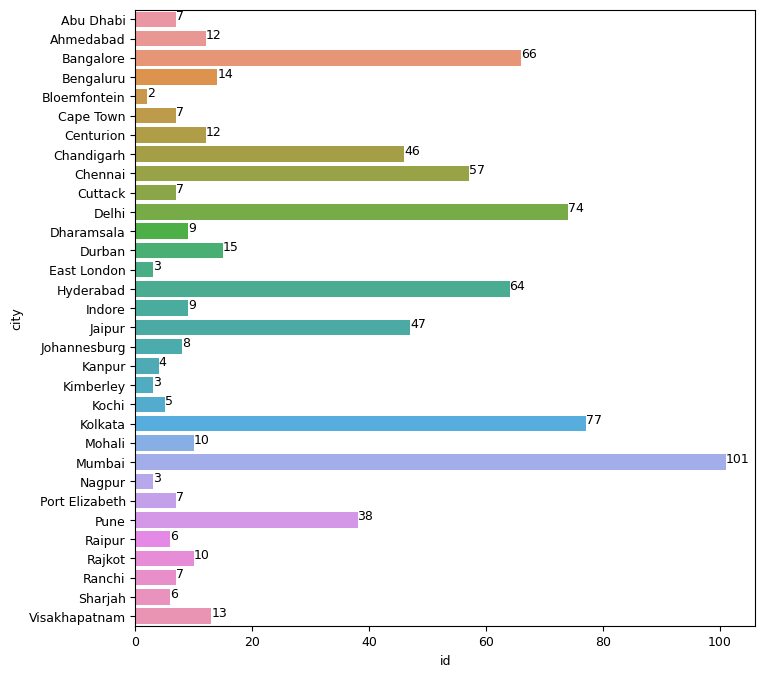

In [10]:
match_loc=match_df.groupby('venue')['id'].count()
matplotlib.rcParams['font.size']=9
matplotlib.rcParams['figure.figsize']=(8,8)

sns.barplot(x=match_loc,y=match_loc.index)
for index, value in enumerate(match_loc):
    plt.text(value, index, str(value))
plt.show()
match_city=match_df.groupby('city')['id'].count()
matplotlib.rcParams['font.size']=9
matplotlib.rcParams['figure.figsize']=(8,8)

sns.barplot(x=match_city,y=match_city.index)
for index, value in enumerate(match_city):
    plt.text(value, index, str(value))
plt.show()

## Its interesting that the number of matches played in Mumbai is highest. But since there are 2 stadiums in mumbai ,Eden Gardens (kolkata) leads in most number of matches played in a single stadium

# Players
---

## About records of players

## 1.Man of the match

In [11]:
mof_df=match_df.groupby('player_of_match')[['id']].count()
mof_df=mof_df.sort_values('id', ascending=False).reset_index()
mof_df.reset_index(drop=True, inplace=True)
mof_df.set_index('player_of_match', inplace=True)

In [12]:
mod_df=mof_df.rename(columns={'player_of_match':'a','id':'Count'})
mod_df[:5]

,Count
player_of_match,
CH Gayle,21
AB de Villiers,20
MS Dhoni,17
DA Warner,17
RG Sharma,17


# 2.Fielding

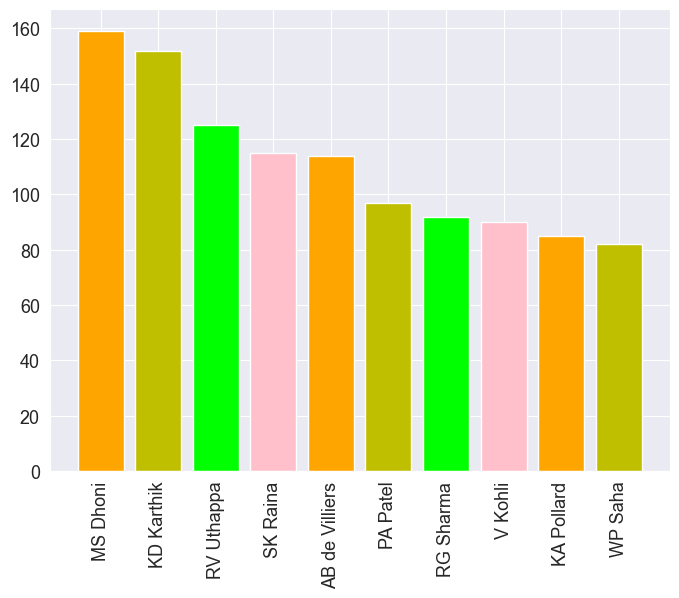

In [13]:
dismissal_type=deliveries_df.groupby('fielder')[['dismissal_kind']].count()
dismissal_type=dismissal_type.sort_values('dismissal_kind',ascending = False).reset_index()

dismissal_type=dismissal_type.rename(columns={'dissmissal_kind':'No_dismissals'})
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=13
matplotlib.rcParams['figure.figsize']=(8,6)
plt.bar(x=dismissal_type.fielder[:10],height=dismissal_type.dismissal_kind[:10],color = ['orange','y','lime','pink'])
plt.xticks(rotation=90)



plt.show()
dismissal_type=dismissal_type.set_index('fielder')


# Toss

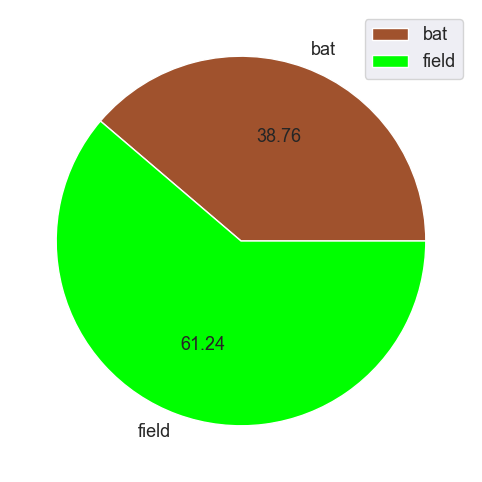

In [14]:
toss_decision=match_df.groupby('toss_decision')[['id']].count()
toss_decision=toss_decision.rename(columns={'id':'count'})
temp=toss_decision.values
temp=temp.flatten()

plt.pie(temp,labels=toss_decision.index,autopct='%.2f',colors = ['sienna','lime'])
plt.legend(toss_decision.index,loc='upper right')
plt.show()

### Teams prefer to chase down targets.

### Now lets see sucess rate of fielding first

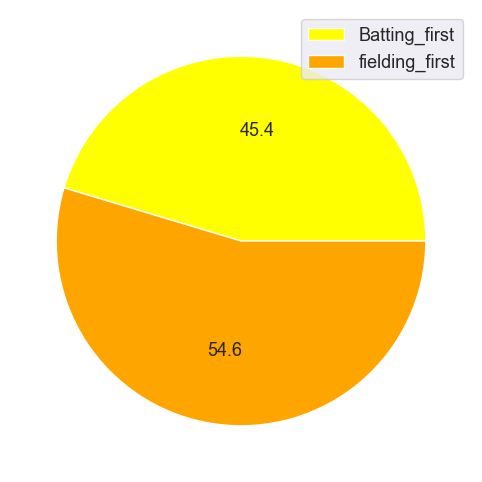

In [15]:
x=match_df[(match_df.win_by_runs>0)]['id'].count()
y=match_df[(match_df.win_by_wickets>0)]['id'].count()
plt.pie([x,y],autopct='%0.1f',colors = ['yellow','orange'],startangle=0)
plt.legend(['Batting_first','fielding_first'],loc=1)
plt.show()

## Now we know why teams prefer fiedling first !!!

## `Data of any team `
### Enter the teams data for which you want to see the toss vs win in team interested='  '


* Rising Pune Supergiant	
* Delhi Capitals	
* Chennai Super Kings
* Mumbai Indians	
* Sunrisers Hyderabad	
* Kolkata Knight Riders	
* Rajasthan Royals	
* Royal Challengers Bangalore	
* Kings XI Punjab
* Gujarat Lions	
* Kochi Tuskers Kerala	
* Delhi Daredevils
* Deccan Chargers	
* Pune Warriors

In [16]:
team_interested='Mumbai Indians'

toss_winner=match_df.groupby(['toss_winner','toss_decision','winner'])[['id']].count()
toss_winner=toss_winner.rename(columns={'id':'count'})
print("Showing data of :",team_interested)
toss_winner.loc[(team_interested)]

Showing data of : Mumbai Indians


count
toss_decision winner                            
bat           Chennai Super Kings              3
              Delhi Daredevils                 3
              Kings XI Punjab                  3
              Kolkata Knight Riders            1
              Mumbai Indians                  25
              Rajasthan Royals                 3
              Rising Pune Supergiants          1
              Royal Challengers Bangalore      3
              Sunrisers Hyderabad              2
field         Chennai Super Kings              2
              Delhi Capitals                   1
              Delhi Daredevils                 3
              Kings XI Punjab                  6
              Kolkata Knight Riders            2
              Mumbai Indians                  31
              Pune Warriors                    1
              Rising Pune Supergiant           2
              Royal Challengers Bangalore      3
              Sunrisers Hyderabad              3

No of toss winners becoming match winner : 393
Total no of matches                      : 756


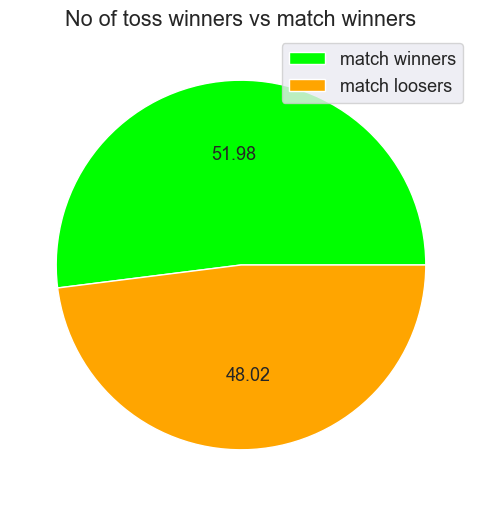

In [17]:
x=match_df[(match_df.toss_winner==match_df.winner)]['id'].count()
total=match_df['id'].count()
print("No of toss winners becoming match winner :",x)
print("Total no of matches                      :",total)
data=[x,total-x]
plt.pie(data,autopct='%.2f',colors = ['lime','orange'],startangle=0)
plt.legend(['match winners','match loosers'],loc=1)
plt.title("No of toss winners vs match winners")
plt.show()

## Rain - delay

no of matches delayed by rain (dl applied): 19
In such cases: 
	 - batting first won : 11 times
	 - fielding first won : 8 times


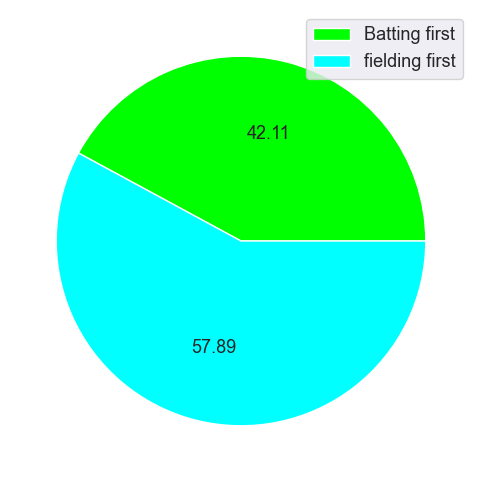

In [18]:
dl_applied=match_df[(match_df.dl_applied==1)]['id'].count()
dl_bowl_won=match_df[(match_df.dl_applied==1) & (match_df.win_by_wickets>0)]['id'].count()
dl_bat_won=match_df[(match_df.dl_applied==1) & (match_df.win_by_runs>0)]['id'].count()
print("no of matches delayed by rain (dl applied):",dl_applied)
print("In such cases: ")
print("\t - batting first won :",dl_bat_won,"times")
print("\t - fielding first won :",dl_bowl_won,"times")
plt.pie([dl_bowl_won,dl_bat_won],autopct='%2.2f',colors = ['lime','cyan'],startangle=0)
plt.legend(["Batting first","fielding first"])
plt.show()

## Shows us that dl system favours batting team more !

In [19]:
mi_csk=match_df[((match_df.team1 =="Mumbai Indians") & 
                   (match_df.team2 =="Chennai Super Kings")) | 
                  
                  ((match_df.team2 =="Mumbai Indians") & 
                   (match_df.team1 =="Chennai Super Kings"))]
mi_csk


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
66,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
95,96,2008,Mumbai,2008-05-14,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba,NaN
117,118,2009,Cape Town,2009-04-18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan,NaN
161,162,2009,Port Elizabeth,2009-05-16,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel,NaN
193,194,2010,Mumbai,2010-03-25,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba,NaN
210,211,2010,Chennai,2010-04-06,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,24,0,SK Raina,"MA Chidambaram Stadium, Chepauk",S Asnani,DJ Harper,NaN
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN
256,257,2011,Mumbai,2011-04-22,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,8,0,Harbhajan Singh,Wankhede Stadium,Asad Rauf,AM Saheba,NaN
307,308,2012,Chennai,2012-04-04,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,RE Levi,"MA Chidambaram Stadium, Chepauk",JD Cloete,SJA Taufel,NaN
354,355,2012,Mumbai,2012-05-06,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,2,DR Smith,Wankhede Stadium,Asad Rauf,S Asnani,NaN


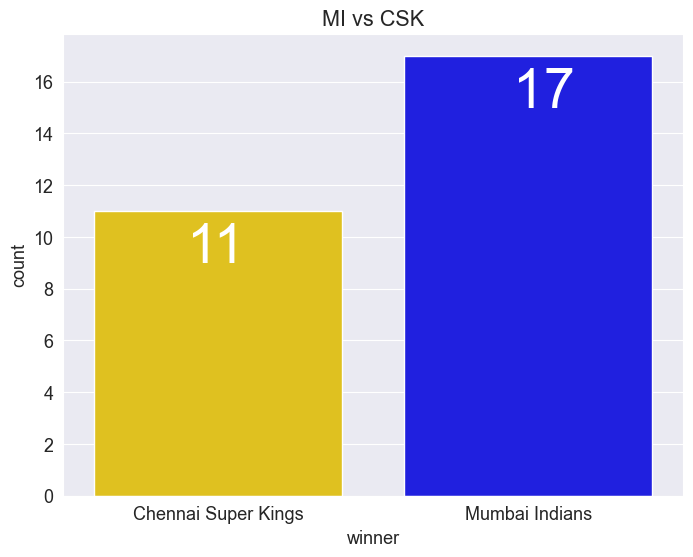

In [24]:
plt.title('MI vs CSK')
sns.countplot(x=mi_csk['winner'],palette=['gold','blue'])
plt.text(-0.1,9,s=mi_csk['winner'].value_counts()['Chennai Super Kings'], color='white', size=40)
plt.text(0.95,15,s=mi_csk['winner'].value_counts()['Mumbai Indians'], color='white', size=40);
plt.show()

# Finals

In [29]:
#Creating a dataframe of final matches
final_match_df = match_df.groupby('season').tail(1).sort_values('season').reset_index()
final_match_df

,index,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
1,173,174,2009,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN
2,233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN
3,306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN
4,380,381,2012,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel,NaN
5,456,457,2013,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel,NaN
6,516,517,2014,Bangalore,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
7,575,576,2015,Kolkata,2015-05-24,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens,HDPK Dharmasena,RK Illingworth,NaN
8,635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
9,58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN


In [30]:
final_match_df['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

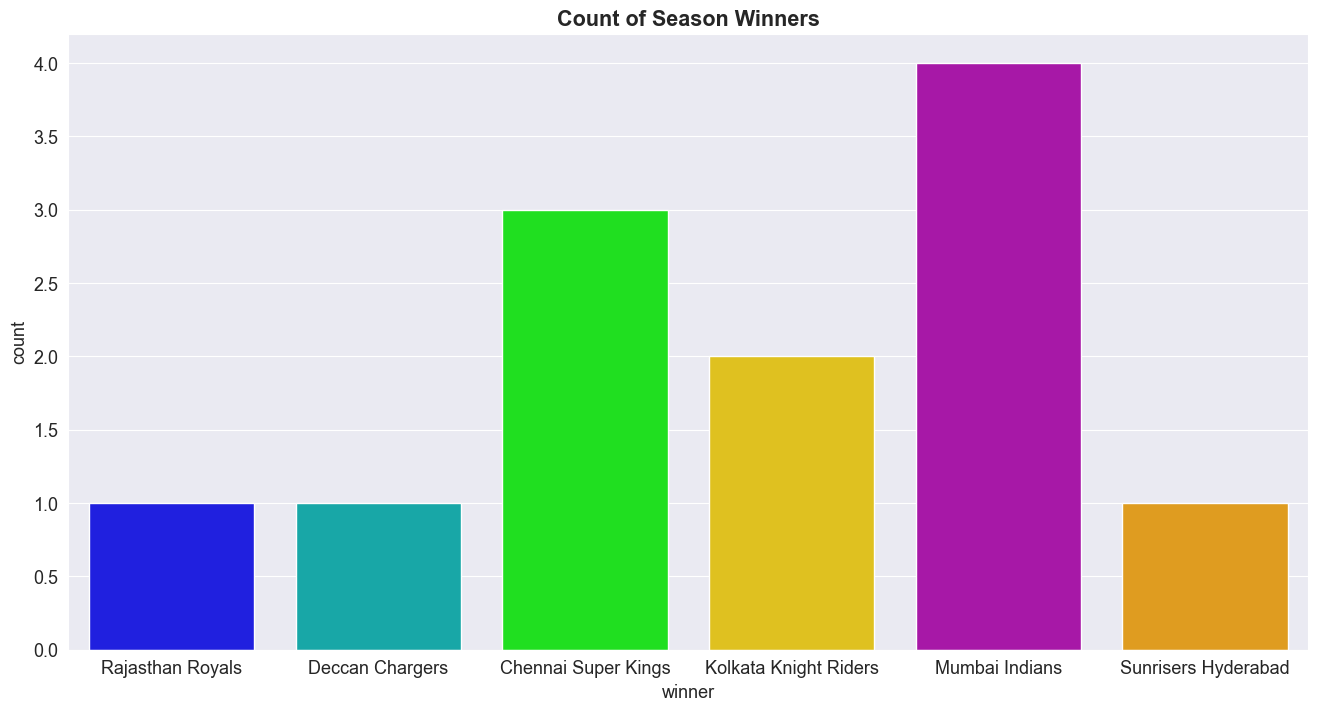

In [36]:
plt.figure(figsize=(16,8))
plt.title('Count of Season Winners',fontweight=800)
sns.countplot(x=final_match_df['winner'],palette=['b','c','lime','gold','m','orange']);
plt.show()

### Maximum number of finals played

In [37]:
final_match_team = pd.concat([final_match_df['team1'],final_match_df['team2']])

In [38]:
final_match_team.value_counts()

Chennai Super Kings            8
Mumbai Indians                 5
Royal Challengers Bangalore    3
Sunrisers Hyderabad            2
Kolkata Knight Riders          2
Deccan Chargers                1
Kings XI Punjab                1
Rajasthan Royals               1
Rising Pune Supergiant         1
dtype: int64

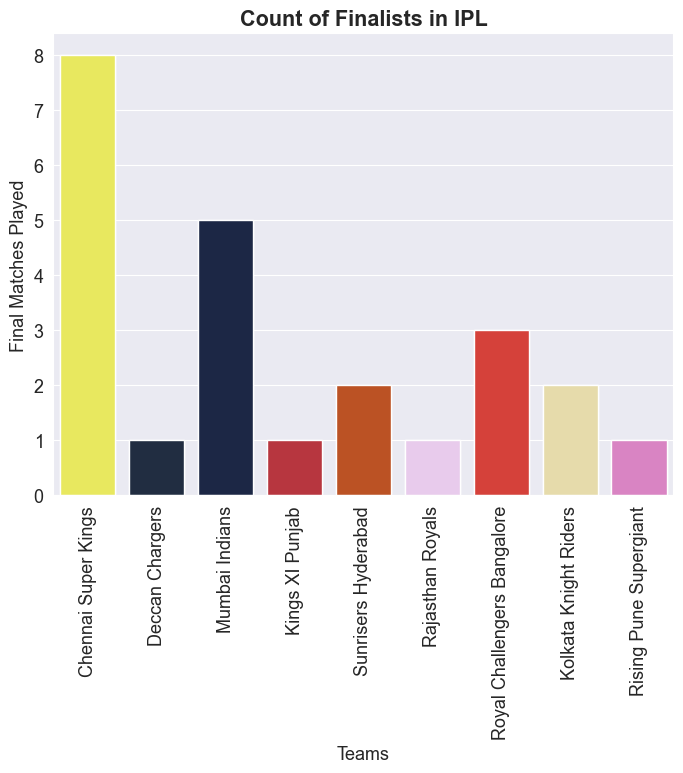

In [40]:
plt.title('Count of Finalists in IPL',fontweight=800)
plt.xlabel('Teams')
sns.countplot(x=final_match_team,palette=['#FFFF48','#1C2C46','#15244C','#CD202D','#D4480B','#ECC5F2','#EF2920','#F0E1A1','#E776CA'])
plt.ylabel('Final Matches Played')
plt.xticks(rotation=90);
plt.show()